<a href="https://colab.research.google.com/github/dtabuena/Images/blob/main/DFOF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tifffile
import numpy as np
from google import colab
from matplotlib import pyplot as plt

# # Open Bin Save
def get_drobox_file(new_filename, link):
    !wget -O $new_filename $link
    return new_filename


def bin_stack(im,bin_factor):
    height = im.shape[1] // bin_factor
    width = im.shape[2] // bin_factor
    im = im[:, :height * bin_factor, : width * bin_factor]
    im = im.reshape(im.shape[0], height, bin_factor, width, bin_factor)
    im = im.sum((2, 4), dtype='uint32')
    return im


def open_bin_save(db_link,new_name,bin_factor):
    print('importing')
    _ = get_drobox_file(new_name, db_link)
    print('reading')
    im = tifffile.imread('/content/'+new_name, maxworkers=6)
    print('binning')
    im = bin_stack(im, bin_factor)
    print('saving')
    tifffile.imwrite('/content/my_tiff_bin.tiff', im) #, imagej=True

    !zip -r '/content/my_tiff_bin.zip' '/content/my_tiff_bin.tiff'

    print('downloading')
    colab.files.download('/content/my_tiff_bin.zip')
    return im



In [ ]:
new_name = 'my_tiff.tiff'
db_link = 'https://www.dropbox.com/s/25s9avjszghte1k/s3_cnt%5B1-5000_EX0%5D.TIF?dl=0'
bin_factor=6
im = open_bin_save(db_link,new_name,bin_factor)


(5000, 10000)


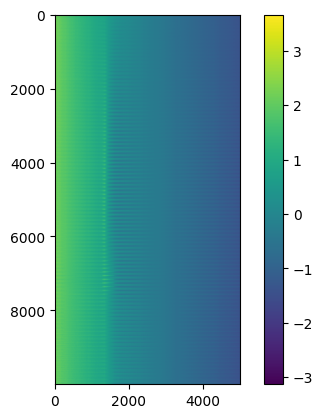

In [6]:
im_shape = im.shape
im_r = np.reshape(im, [im_shape[0], im_shape[1]*im_shape[2]])
print(im_r.shape)

im_r_std = np.expand_dims(np.std(im_r,axis=0),1)
im_r_avg = np.expand_dims(np.average(im_r,axis=0),1)
im_r_n = (im_r-im_r_avg.T)/im_r_std.T

f0 = 1200
im_r_d = im_r / im_r[f0,:]

plt.imshow(im_r_n.T)
plt.colorbar()
plt.show()


In [7]:
from matplotlib import pyplot as plt
from sklearn.decomposition import FastICA, TruncatedSVD, SparsePCA
import sklearn

In [11]:


spca = SparsePCA(n_components=3,random_state=0)
im_trans =  spca.fit_transform(im_r.T)

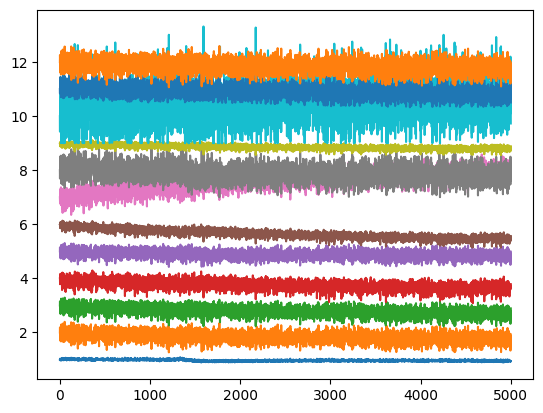

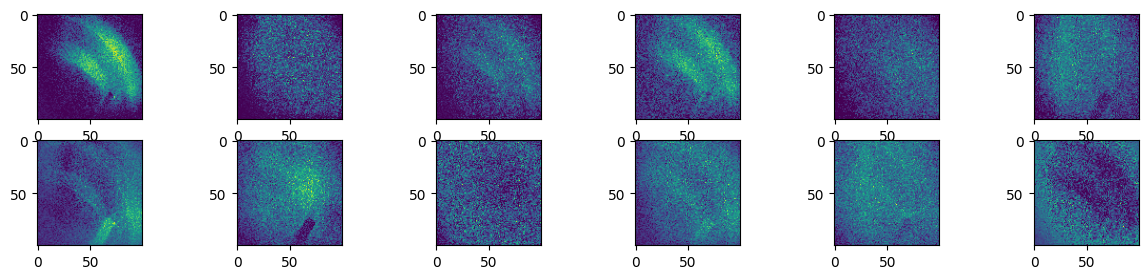

In [54]:
from sklearn.decomposition import NMF
# n_components=12
# model = NMF(n_components=n_components, init='random', random_state=0)
# W = model.fit_transform(im_r)
# H = model.components_
fig,ax=plt.subplots()
ax.plot(W / W[0,:] + np.arange(n_components))
# plt.legend(range(n_components))

h_r = np.reshape(H,[n_components,im_shape[1], im_shape[2]])
fig,ax=plt.subplots(2,int(n_components/2),figsize=(15,3))
ax = ax.flatten()
for ki in range(n_components):
    ax[ki].imshow(h_r[ki,:,:])


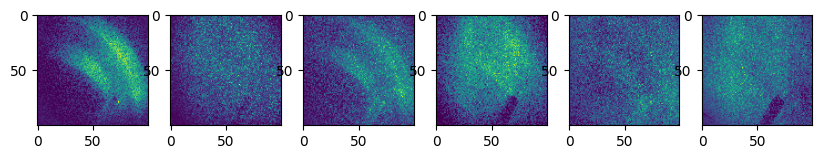

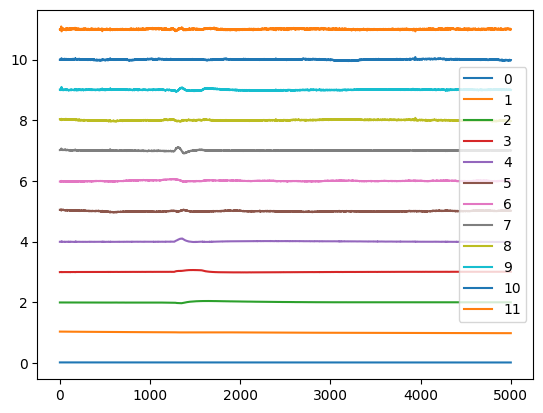

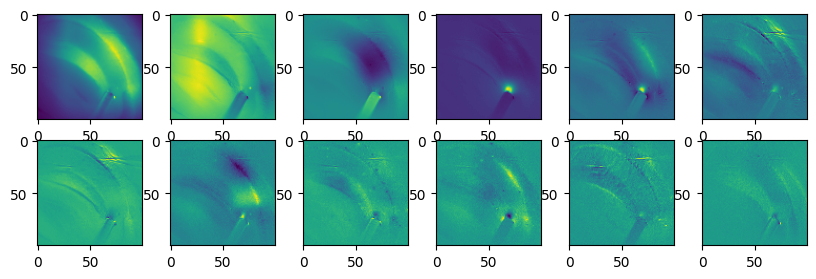

In [57]:
from sklearn.utils.extmath import randomized_svd
n_components = 12
u, s, vt = randomized_svd(im_r,n_components=n_components,n_iter=5,random_state=None)
fig,ax=plt.subplots()
ax.plot(u + np.arange(n_components))
ax.legend(np.arange(n_components))
vt_r = np.reshape(vt,[n_components,im_shape[1], im_shape[2]])
fig,ax=plt.subplots(2,int(n_components/2),figsize=(10,3))
ax = ax.flatten()
for ki in range(n_components):
    ax[ki].imshow(vt_r[ki,:,:])


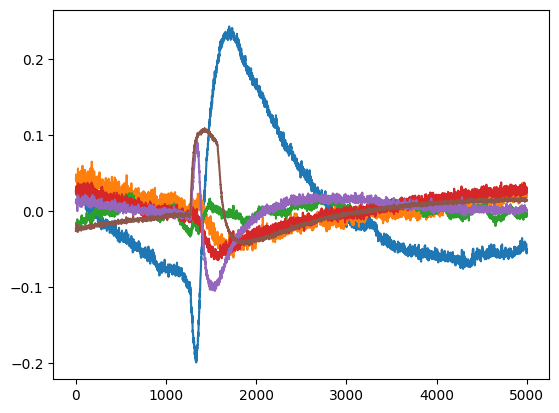

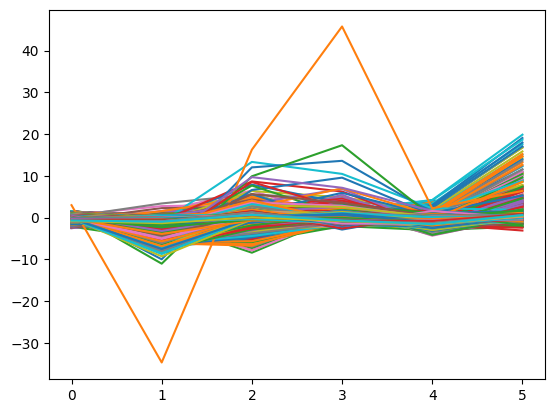

In [42]:

ica = FastICA(n_components=n_components,random_state=0,whiten='unit-variance')
im_trans =  ica.fit_transform(im_r_n.T)
A_ = ica.mixing_  # Get estimated mixing matrix
plt.plot(A_)
plt.show()
plt.plot(im_trans.T)
plt.show()